In [1]:
import src.utils.pipelines as pip
%load_ext autoreload
%autoreload 2
# Uncomment the following line to write the data 
#main_chars, top_mov_per_year, cmu_imdb, movies_char, blockbusters, chars, movies = pip.write_CMU_and_IMDB() # /!\ takes a long time
# Uncomment the following line to read the data (way faster)
main_chars, top_mov_per_year, cmu_imdb, movies_char, blockbusters, chars, movies = pip.read_CMU_IMDB()

/home/jeremy/miniconda3/envs/ada/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#global_names, uk, us, fr, norway = pip.write_all_names_data()
global_names, uk, us, fr, norway = pip.read_all_names_data()

UK : Loading clean data from data/clean/names/ukbabynames.csv
France : Loading clean data from data/clean/names/france.csv
US : Loading clean data from data/clean/names/babyNamesUSYOB-full.csv
Norway : Loading clean data from data/clean/names/norway_merged.csv
UK & France & US & Norway : Loading clean data from data/clean/names/UK_France_US_Norway.csv


In [7]:
#mean = pip.load_influenced_means()
mean = pip.compute_all_influence_mean(main_chars, fr, output_path="france_mean.csv") # changer avec le pays qu'on veux


-------------------
Computing the influenced names using the mean difference......
-------------------
US : Data is clean and conforms to the expected structure !
Splitting the names in 3918 main characters to 6512 names
Fraction of the main characters in the names data : 0.6607800982800983
25%
50%
75%
100%
Influenced names computed and saved in data/clean/influenced_names_means_diff.csv


/home/jeremy/Documents/epfl/ada/ada-2024-project-dondata2025/src/utils/pipelines.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersection["Influence"] = intersection.apply(lambda x:


In [ ]:
prophet = pip.compute_all_influence_prophet(mean, fr, "france_prediction.csv") # la meme

19:19:20 - cmdstanpy - INFO - Chain [1] start processing
19:19:20 - cmdstanpy - INFO - Chain [1] done processing



-------------------
Using the mean difference results to speed up the Prophet method......
-------------------
Using 692 names to speed up the SARIMA method. (from 1647 names)
EMMA is influenced by a movie in 1998
MARTIN is influenced by a movie in 1987
NOAH is influenced by a movie in 2002
JULIE is influenced by a movie in 1993
WILLIAM is influenced by a movie in 2007
WILLIAM is influenced by a movie in 2007
WILLIAM is influenced by a movie in 2005
WILLIAM is influenced by a movie in 2005
MARCUS is influenced by a movie in 1993
NOAH is influenced by a movie in 2000
MARTIN is influenced by a movie in 1978
WILLIAM is influenced by a movie in 2003
ODA is influenced by a movie in 1990
BENJAMIN is influenced by a movie in 1994
MIA is influenced by a movie in 2001
THEO is influenced by a movie in 2006
BENJAMIN is influenced by a movie in 1992
WILLIAM is influenced by a movie in 2000
WILLIAM is influenced by a movie in 1999
WILLIAM is influenced by a movie in 1998
JULIE is influenced by a m

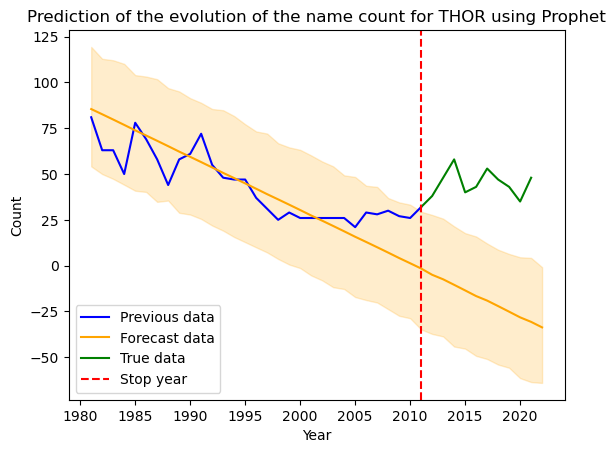

THOR is influenced by a movie in 2011


In [ ]:
import src.models.naming_prediction as np

pred = pip.is_name_influenced_prophet("THOR", fr, 2011, True)